In [1]:
# Genetic algorithm for transforming random string to the fragment from Shakespeare's poem.
# String should be the same length

In [94]:
import random
import string
import numpy as np
from math import inf
import matplotlib.pyplot as plt

In [59]:
''' 
Kind of fitness function for this GA,
returns number of matching chars at current position.
It is obvious, that if this function returns 0, 
it means that str1 == str2
'''
def fitness(str1, str2):
    difference = 0
    for i in range(len(str1)):
        if str1[i] != str2[i]:
            difference += 1
    return difference

In [60]:
'''
Generate initial population
'''
def generate_random_string(length):
    return ''.join(random.choice(string.ascii_lowercase + ' ') for _ in range(length))

In [91]:
'''
Selection operator: takes whole population and returns n sentences,
(where n - population size) which are matching the most with the Shakespeare's string. 
'''
def selection(population, reference_sample, population_size=5):
    assert population.size >= population_size, "Population size is less than default population size!"
    new_population = []
    fitness_values = []
    errors_in_population = 0
    # Calculate fitness value for each sample
    for sample in population:
        fitness_values.append(fitness(sample, reference_sample))
    # Seach [population_size] best samples from the whole generation
    #print(fitness_values)
    for _ in range(population_size):
        best_sample_idx = np.argmin(fitness_values)
        new_population.append(population[best_sample_idx])
        errors_in_population += fitness_values[best_sample_idx]
        fitness_values[best_sample_idx] = inf
    return np.array(new_population), errors_in_population 

In [87]:
'''
Mutation operator: takes whole population and apllies mutations
with [p] probability [mutations_number] times for one parent.
Each mutation of parental string is an offspring.
Therefore this operator returns generation of 
size = population.size * mutations_number. This population
will be reduced in selection operator.
'''
def mutation(population, mutations_number=5, p=1):
    offspring_population = []
    for parent in population:
        for _ in range(mutations_number):
            # Roll the dice if this offspring will be mutated
            offspring = parent
            dice = np.random.uniform()
            if dice <= p:
                # If so, choose the position in this string to change
                pos = random.randint(0, len(offspring)-1)
                mutated_gene = random.choice(string.ascii_lowercase + ' ')
                offspring = offspring[:pos] + mutated_gene + offspring[pos+1:]
            offspring_population.append(offspring)
    return np.array(offspring_population)

In [136]:
# EVOLUTION !!1
generation_counter = 0
errors = []
ref = "genetic algorithm works"
pop_size = 5
survivors = np.array([generate_random_string(len(ref)) for _ in range(pop_size)])
print(population)
#while ref not in population:
error = inf
while ref not in survivors:#error > 5:
    population = mutation(survivors, mutations_number=100)
    generation_counter += 1
    survivors, error = selection(population, ref, population_size=pop_size)
    print(error)
    errors.append(error)
    print(survivors)

['the quick brodn fox jumps over the lazy dog'
 'the quickebromn fox jumps over the lazy dog'
 'the quick bromn zox jumps over the lazy dog'
 'the quick bromn fox jumps over thp lazy dog'
 'the quick bromn fox jumpv over the lazy dog'
 'thetquick bromn fox jumps over the lazy dog'
 'the quick bromn fox jumps over the oazy dog'
 'the quick bromn fox juyps over the lazy dog'
 'the quick brovn fox jumps over the lazy dog'
 'the quick bromi fox jumps over the lazy dog'
 'the quicv bromn fox jumps over the lazy dog'
 'the quick bromn fox jumps ovmr the lazy dog'
 'the quickkbromn fox jumps over the lazy dog'
 'the quick bmomn fox jumps over the lazy dog'
 'thi quick bromn fox jumps over the lazy dog'
 'the fuick bromn fox jumps over the lazy dog'
 'the quick bromn fox jumps oversthe lazy dog'
 'the quick bromnpfox jumps over the lazy dog'
 'the qulck bromn fox jumps over the lazy dog'
 'thecquick bromn fox jumps over the lazy dog'
 'the quick bromn fox jumps ovar the lazy dog'
 'the quick b

 'zenetic algorithr works']
6
['genetic algorithk works' 'zenetic algorithm works'
 'zenetic algorithm works' 'genetic algorithr works'
 'zenetic algorithr works']
5
['genetic algorithk works' 'genetic algorithk works'
 'genetic algorithk works' 'genetic algorithy works'
 'genetic algorithk works']
2
['genetic algorithm works' 'genetic algorithm works'
 'genetic algorithm works' 'genetic algorithk works'
 'genetic algorithu works']


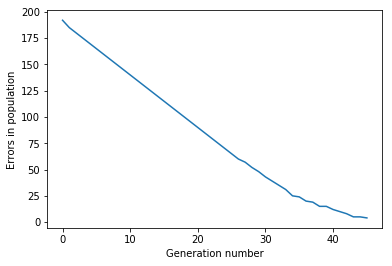

In [135]:
plt.plot(range(generation_counter), errors)
plt.ylabel('Errors in population')
plt.xlabel('Generation number')
plt.show()